In [15]:
import pandas as pd
#adoptable dogs dataset
#https://www.kaggle.com/datasets/jmolitoris/adoptable-dogs/data
dogs = pd.read_csv('/Users/ecuerbo/Desktop/data/dogs.csv')
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2937 non-null   int64  
 1   name               2845 non-null   object 
 2   age                2937 non-null   float64
 3   sex                2937 non-null   object 
 4   breed              2937 non-null   object 
 5   date_found         2937 non-null   object 
 6   adoptable_from     2937 non-null   object 
 7   posted             2937 non-null   object 
 8   color              2937 non-null   object 
 9   coat               2937 non-null   object 
 10  size               2937 non-null   object 
 11  neutered           1852 non-null   object 
 12  housebroken        460 non-null    object 
 13  likes_people       1999 non-null   object 
 14  likes_children     1219 non-null   object 
 15  get_along_males    1633 non-null   object 
 16  get_along_females  1673 

In [16]:
dogs["coat"] = dogs["coat"].astype("category")
dogs["coat"].value_counts(dropna=False)

short         1972
medium         565
wirehaired     220
long           180
Name: coat, dtype: int64

In [17]:
#Series.cat.method_name
dogs["coat"] = dogs["coat"].cat.set_categories(
    new_categories=["short","medium","long"])
dogs["coat"].value_counts(dropna=False)

short     1972
medium     565
NaN        220
long       180
Name: coat, dtype: int64

In [18]:
dogs["coat"] = dogs["coat"].cat.set_categories(
    new_categories=["short","medium","long"],
    ordered=True)
dogs["coat"].head(3)

0    short
1    short
2    short
Name: coat, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [19]:
#missing categories
dogs["likes_people"].value_counts(dropna=False)

yes    1991
NaN     938
no        8
Name: likes_people, dtype: int64

In [20]:
#adding categories
dogs["likes_people"] = dogs["likes_people"].astype("category")
dogs["likes_people"] = dogs["likes_people"].cat.add_categories(
    new_categories =["did not check","could not tell"])
dogs["likes_people"].cat.categories

Index(['no', 'yes', 'did not check', 'could not tell'], dtype='object')

In [21]:
dogs["likes_people"].value_counts(dropna=False)

yes               1991
NaN                938
no                   8
did not check        0
could not tell       0
Name: likes_people, dtype: int64

In [22]:
#remove the wirehaired
dogs = pd.read_csv('/Users/ecuerbo/Desktop/data/dogs.csv')
dogs["coat"] = dogs["coat"].astype("category")
#dogs["coat"] = dogs["coat"].cat.remove_categories(removals=["wirehaired"])
dogs["coat"].cat.categories

Index(['long', 'medium', 'short', 'wirehaired'], dtype='object')

In [23]:
dogs["coat"].value_counts(dropna=0)

short         1972
medium         565
wirehaired     220
long           180
Name: coat, dtype: int64

In [24]:
# Check frequency counts while also printing the NaN count
print(dogs["keep_in"].value_counts(dropna=False))

# Switch to a categorical variable
dogs["keep_in"] = dogs["keep_in"].astype("category")

# Add new categories
new_categories = ["Unknown History", "Open Yard (Countryside)"]
#dogs["keep_in"] = dogs["keep_in"].cat.add_categories(new_categories)

# Check frequency counts one more time
print(dogs["keep_in"].value_counts(dropna=False))

both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: keep_in, dtype: int64
both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: keep_in, dtype: int64


In [25]:
dogs["likes_children"]=dogs["likes_children"].astype('category')
# Set "maybe" to be "no"
dogs.loc[dogs["likes_children"] == "maybe", "likes_children"] = "no"

# Print out categories
print(dogs["likes_children"].cat.categories)

# Print the frequency table
print(dogs["likes_children"].value_counts())

# Remove the `"maybe" category
#dogs["likes_children"] = dogs["likes_children"].cat.remove_categories(["maybe"])
#print(dogs["likes_children"].value_counts())

# Print the categories one more time
#print(dogs["likes_children"].cat.categories)

Index(['no', 'yes'], dtype='object')
yes    1172
no       47
Name: likes_children, dtype: int64


In [26]:
dogs.groupby(by=["coat","sex"])[["neutered"]].count()

neutered
coat       sex             
long       female        40
           male          77
medium     female       123
           male         221
short      female       582
           male         659
wirehaired female        46
           male         104

In [27]:
dogs['breed'] = dogs['breed'].astype("category")
dogs["breed"].value_counts()

Unknown Mix                                 1524
German Shepherd Dog Mix                      190
Dachshund Mix                                147
Labrador Retriever Mix                        83
Staffordshire Terrier Mix                     62
                                            ... 
English Cocker Spaniel, Vizsla Mix             1
English Greyhound Mix                          1
English Greyhound, Spanish Greyhound Mix       1
Fox Terrier, German Shepherd Dog Mix           1
Yorkshire Terrier                              1
Name: breed, Length: 277, dtype: int64

In [28]:
#rename categories
my_changes = { "Unknown Mix": "Unknown"}
dogs["breed"] = dogs["breed"].cat.rename_categories(my_changes)
dogs["breed"].value_counts()

Unknown                                     1524
German Shepherd Dog Mix                      190
Dachshund Mix                                147
Labrador Retriever Mix                        83
Staffordshire Terrier Mix                     62
                                            ... 
English Cocker Spaniel, Vizsla Mix             1
English Greyhound Mix                          1
English Greyhound, Spanish Greyhound Mix       1
Fox Terrier, German Shepherd Dog Mix           1
Yorkshire Terrier                              1
Name: breed, Length: 277, dtype: int64

In [29]:
#rename categories with a function
dogs['sex'] = dogs['sex'].astype('category')
dogs['sex'] = dogs['sex'].cat.rename_categories(lambda c: c.title())
dogs['sex'].cat.categories

Index(['Female', 'Male'], dtype='object')

In [30]:
#collapsing categories setup
update_colors = {
    "black and brown" : "black",
    "black and tan" : "black",
    "black and white" : "black"
}
dogs["main_color"] = dogs["color"].replace(update_colors)

In [31]:
dogs["main_color"] = dogs["main_color"].astype("category")
dogs["main_color"].cat.categories

Index(['apricot', 'black', 'brown', 'brown and white', 'dotted', 'golden',
       'gray', 'gray and black', 'gray and white', 'red', 'red and white',
       'sable', 'saddle back', 'spotty', 'striped', 'tricolor', 'white',
       'wild boar', 'yellow', 'yellow-brown'],
      dtype='object')

In [32]:
#reorder categories
dogs['coat'] = dogs['coat'].cat.reorder_categories(
    new_categories = ['short', 'medium', 'wirehaired','long'],
    ordered = True
)

In [33]:
dogs.groupby(by=['coat'])['age'].mean().round(1)

coat
short         8.4
medium        9.0
wirehaired    8.4
long          9.6
Name: age, dtype: float64

In [36]:
#removing whitespaces
dogs["get_along_cats"] = dogs["get_along_cats"].str.strip()
#captalization
#use .title(),.upper(),.lower()
#replace mispespelled words
replace_map = {"Noo": "No"}
dogs["get_along_cats"].replace(replace_map, inplace=True)

In [40]:
dogs["get_along_cats"].value_counts(dropna=False)

NaN    2506
yes     275
no      156
Name: get_along_cats, dtype: int64

In [42]:
#searching for a string
dogs["breed"].str.contains('Shepherd', regex=False).value_counts()

False    2653
True      284
Name: breed, dtype: int64

In [47]:
#accessing data with loc
dogs["get_along_cats"] = dogs["get_along_cats"].astype("category")
dogs.loc[dogs["get_along_cats"] == "Yes", "size"].value_counts(sort=False)

Series([], Name: size, dtype: int64)

In [48]:
url =  "https://assets.datacamp.com/production/repositories/5809/datasets/7e62911f924c0942b94af5858eff92d81550c77f/lasvegas_tripadvisor.csv"
reviews = pd.read_csv(url)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
reviews["Score"].value_counts()

5    227
4    164
3     72
2     30
1     11
Name: Score, dtype: int64

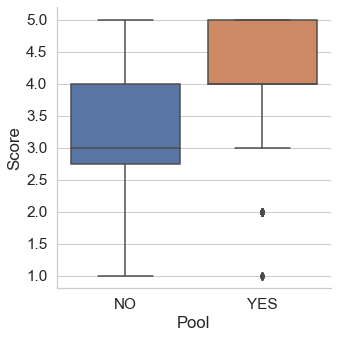

In [51]:
#setting font size and plot background
sns.set(font_scale=1.4)
sns.set_style("whitegrid")

sns.catplot(
    x="Pool",
    y="Score",
    data=reviews,
    kind="box"
);

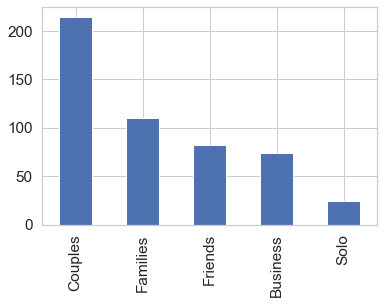

In [55]:
reviews["Traveler type"].value_counts().plot.bar();

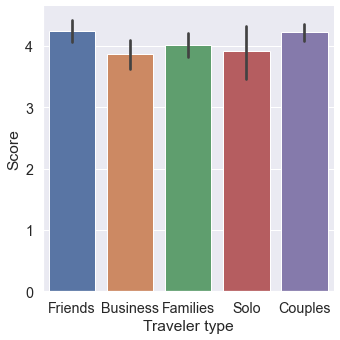

In [56]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
sns.catplot(
    x="Traveler type",
    y="Score",
    data=reviews,
    kind="bar");

In [57]:
#ordering the categories
reviews["Traveler type"] = reviews["Traveler type"].astype('category')
reviews["Traveler type"].cat.categories

Index(['Business', 'Couples', 'Families', 'Friends', 'Solo'], dtype='object')

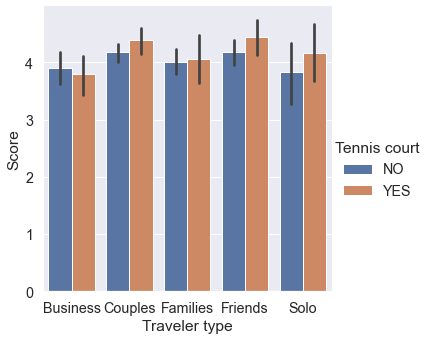

In [59]:
sns.catplot(x="Traveler type", y="Score", data=reviews,kind="bar", hue="Tennis court");

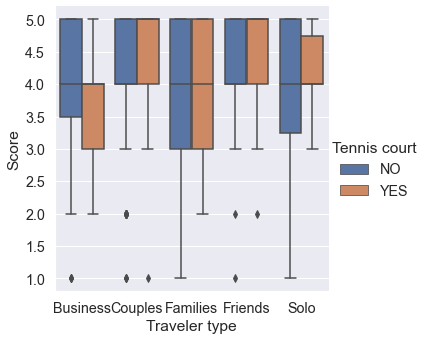

In [60]:
sns.catplot(x="Traveler type", y="Score", data=reviews,kind="box", hue="Tennis court");